There are 25 variables:

        ID: ID of each client
        LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
        SEX: Gender (1=male, 2=female)
        EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
        MARRIAGE: Marital status (1=married, 2=single, 3=others)
        AGE: Age in years
        PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
        PAY_2: Repayment status in August, 2005 (scale same as above)
        PAY_3: Repayment status in July, 2005 (scale same as above)
        PAY_4: Repayment status in June, 2005 (scale same as above)
        PAY_5: Repayment status in May, 2005 (scale same as above)
        PAY_6: Repayment status in April, 2005 (scale same as above)
        BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
        BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
        BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
        BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
        BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
        BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
        PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
        PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
        PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
        PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
        PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
        PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
        default.payment.next.month: Default payment (1=yes, 0=no)

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [219]:
df=pd.read_csv('data/UCI_Credit_Card.csv')

In [220]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [221]:
df.shape

(30000, 25)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

we can see that all the 25 columns have 22003 count which indicates there is no missing value.
we can see that the repayment status is indicated in columns PAY_0, PAY_2 ... with no PAY_1 column, so we rename PAY_0 to PAY_1 for ease of understanding.

In [223]:
df.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

When we check the datatype of each variable of dataset. We see that all the columns are int64 type whereas from previous knowledge we know that SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, default_payment_next_month are categorical features. So we convert these features in categorical.

In [227]:
categorical_col=df.select_dtypes(include=['int64']).columns.to_list()

for i in categorical_col:
    df[i]=df[i].astype('object')


In [228]:
df[categorical_col].dtypes

ID           object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_1        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
def_pay      object
dtype: object

In [229]:
df[['AGE','ID']]=df[['AGE','ID']].astype('int64')

In [230]:
df[['AGE','ID']].dtypes

AGE    int64
ID     int64
dtype: object

In [231]:
df[categorical_col].describe()

,ID,AGE
count,30000.000000,30000.000000
mean,15000.500000,35.485500
std,8660.398374,9.217904
min,1.000000,21.000000
25%,7500.750000,28.000000
50%,15000.500000,34.000000
75%,22500.250000,41.000000
max,30000.000000,79.000000


In [232]:
#checking for null values
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

The data set has no null values.

In [233]:
df.duplicated().sum()

0

THe dataset has no duplicates.

<Axes: >

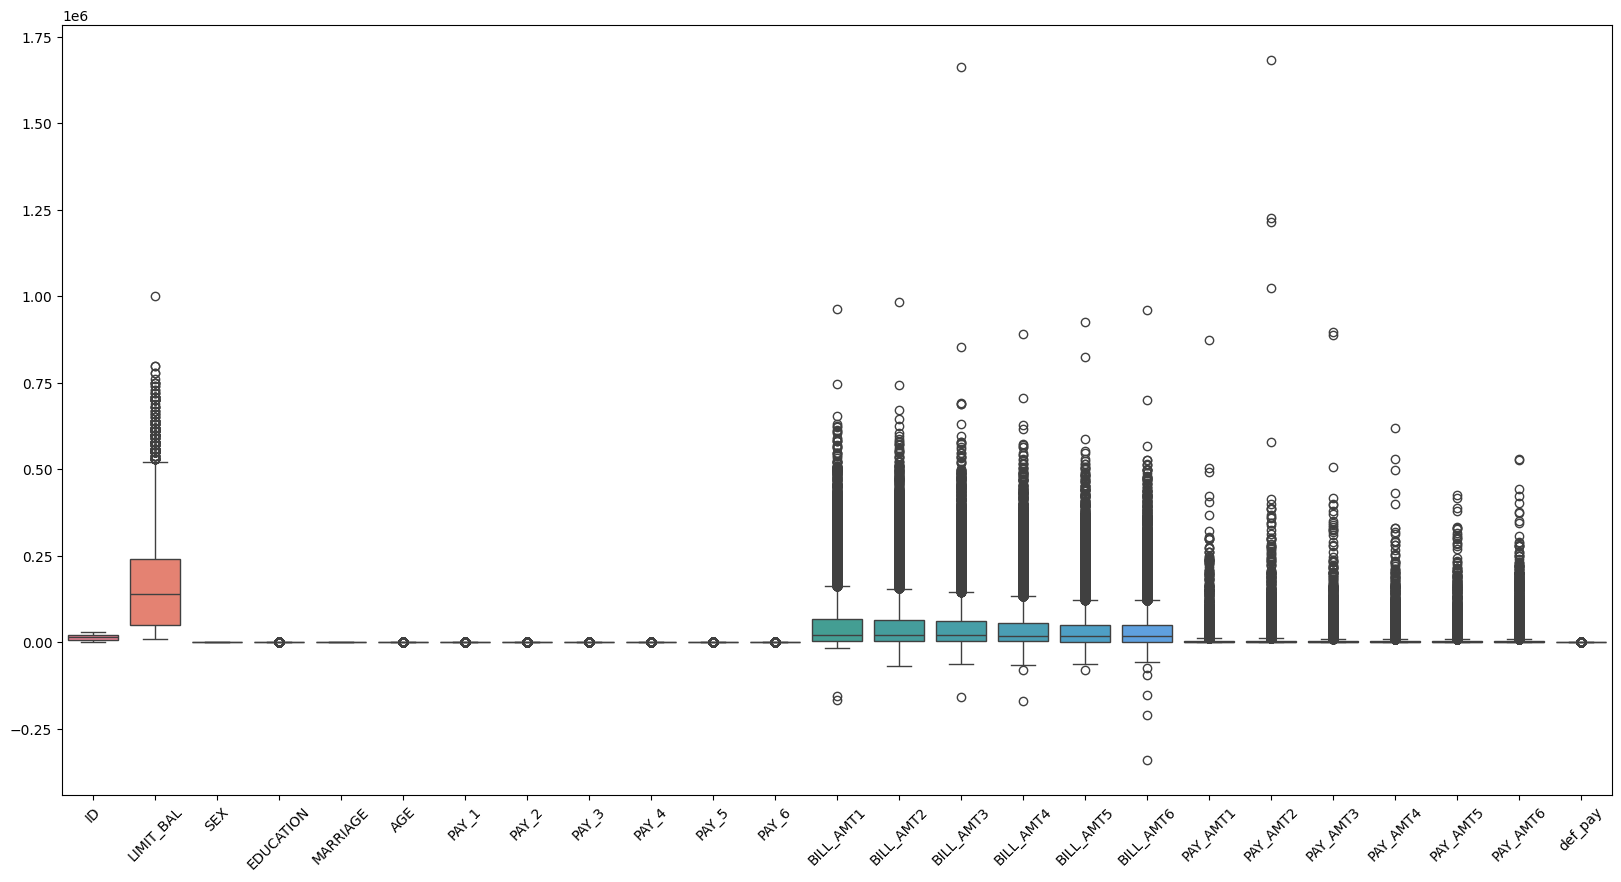

In [234]:
#Checking the presence of outliers.
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(data=df)

There are many outliers in the data.

In [235]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [236]:
#lets see the value counts of the categorical columns.
categ_df=df[['SEX', 'EDUCATION', 'MARRIAGE','PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
for i in categ_df:
    print(df[i].value_counts())

SEX
2    18112
1    11888
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
PAY_1
0     14737
-1     5686
1      3688
-2     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: count, dtype: int64
PAY_2
0     15730
-1     6050
2      3927
-2     3782
3       326
4        99
1        28
5        25
7        20
6        12
8         1
Name: count, dtype: int64
PAY_3
0     15764
-1     5938
-2     4085
2      3819
3       240
4        76
7        27
6        23
5        21
1         4
8         3
Name: count, dtype: int64
PAY_4
0     16455
-1     5687
-2     4348
2      3159
3       180
4        69
7        58
5        35
6         5
1         2
8         2
Name: count, dtype: int64
PAY_5
0     16947
-1     5539
-2     4546
2      2626
3       178
4        84
7        58
5        1

In [237]:
#finding the no.of unique values
for i in categ_df:
    print(df[i].name)
    print(df[i].nunique())

SEX
2
EDUCATION
7
MARRIAGE
4
PAY_1
11
PAY_2
11
PAY_3
11
PAY_4
11
PAY_5
10
PAY_6
10


In [238]:
numerical_col=df.columns[df.dtypes!='object']

In [239]:

df[numerical_col].head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


<Axes: >

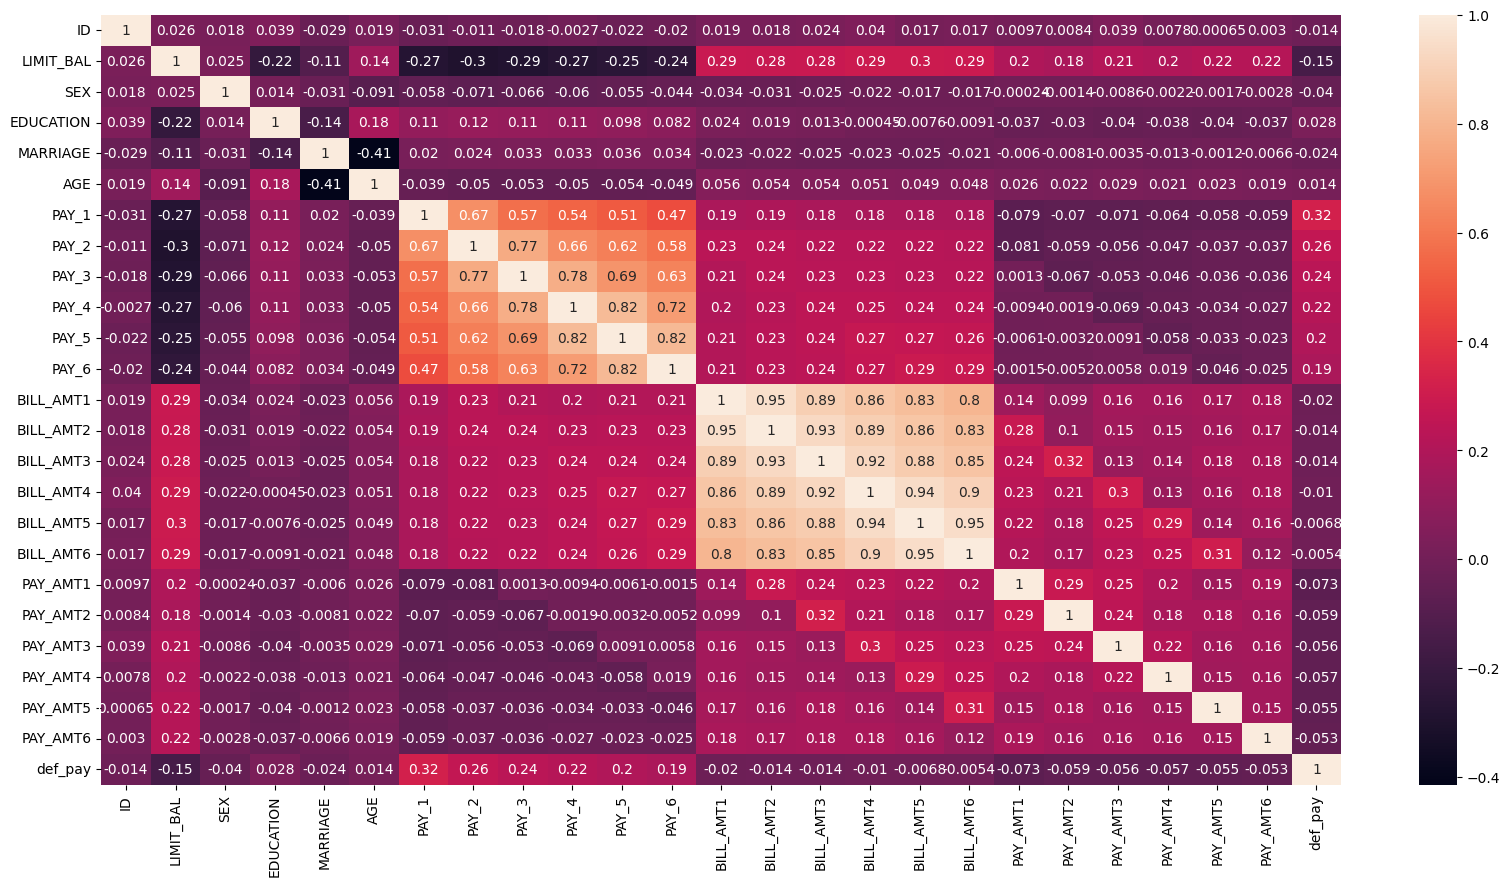

In [240]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

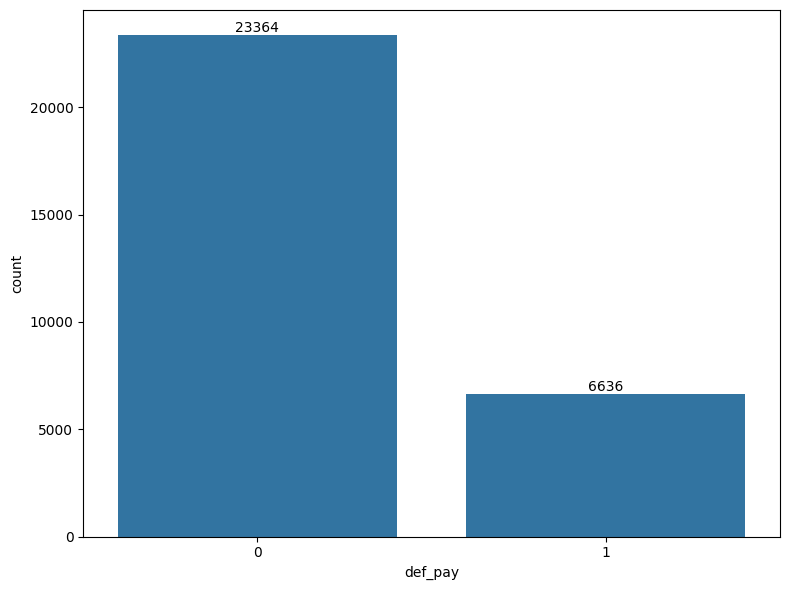

: 

: 

In [ ]:
plt.figure(figsize=(8,6))
fig=sns.countplot(data=df,x='def_pay')
for i in fig.containers:
    fig.bar_label(i)
plt.tight_layout()
plt.show()

The countplot of default payment from history shows that,the paying percentage is much lesser than not paying.

In [241]:
#plotting few bars to understand the education,sex,marriage and age with respect to the default payment.
df1=df[['SEX','EDUCATION','MARRIAGE','def_pay']]

In [242]:
df1.loc[(df1['SEX'] ==1), 'SEX'] = 'MALE'
df1.loc[(df1['SEX'] ==2), 'SEX'] = 'FEMALE'

df1.loc[(df1['EDUCATION'] ==1), 'EDUCATION'] = 'graduate school'
df1.loc[(df1['EDUCATION'] ==2), 'EDUCATION'] = 'university'
df1.loc[(df1['EDUCATION'] ==3), 'EDUCATION'] = 'high school'
df1.loc[(df1['EDUCATION'] ==4), 'EDUCATION'] = 'others'
df1.loc[(df1['EDUCATION'] ==5), 'EDUCATION'] = 'unknown'
df1.loc[(df1['EDUCATION'] ==6), 'EDUCATION'] = 'unknown'

df1.loc[(df1['MARRIAGE'] ==1), 'MARRIAGE'] = 'married'
df1.loc[(df1['MARRIAGE'] ==2), 'MARRIAGE'] = 'single'
df1.loc[(df1['MARRIAGE'] ==3), 'MARRIAGE'] = 'others'

df1.loc[(df1['def_pay']==1),'def_pay']='YES'
df1.loc[(df1['def_pay'] ==0), 'def_pay'] = 'NO'

In [243]:
len(df1.columns)

4

In [244]:
def_cnt = (df1.def_pay.value_counts(normalize=True)*100)

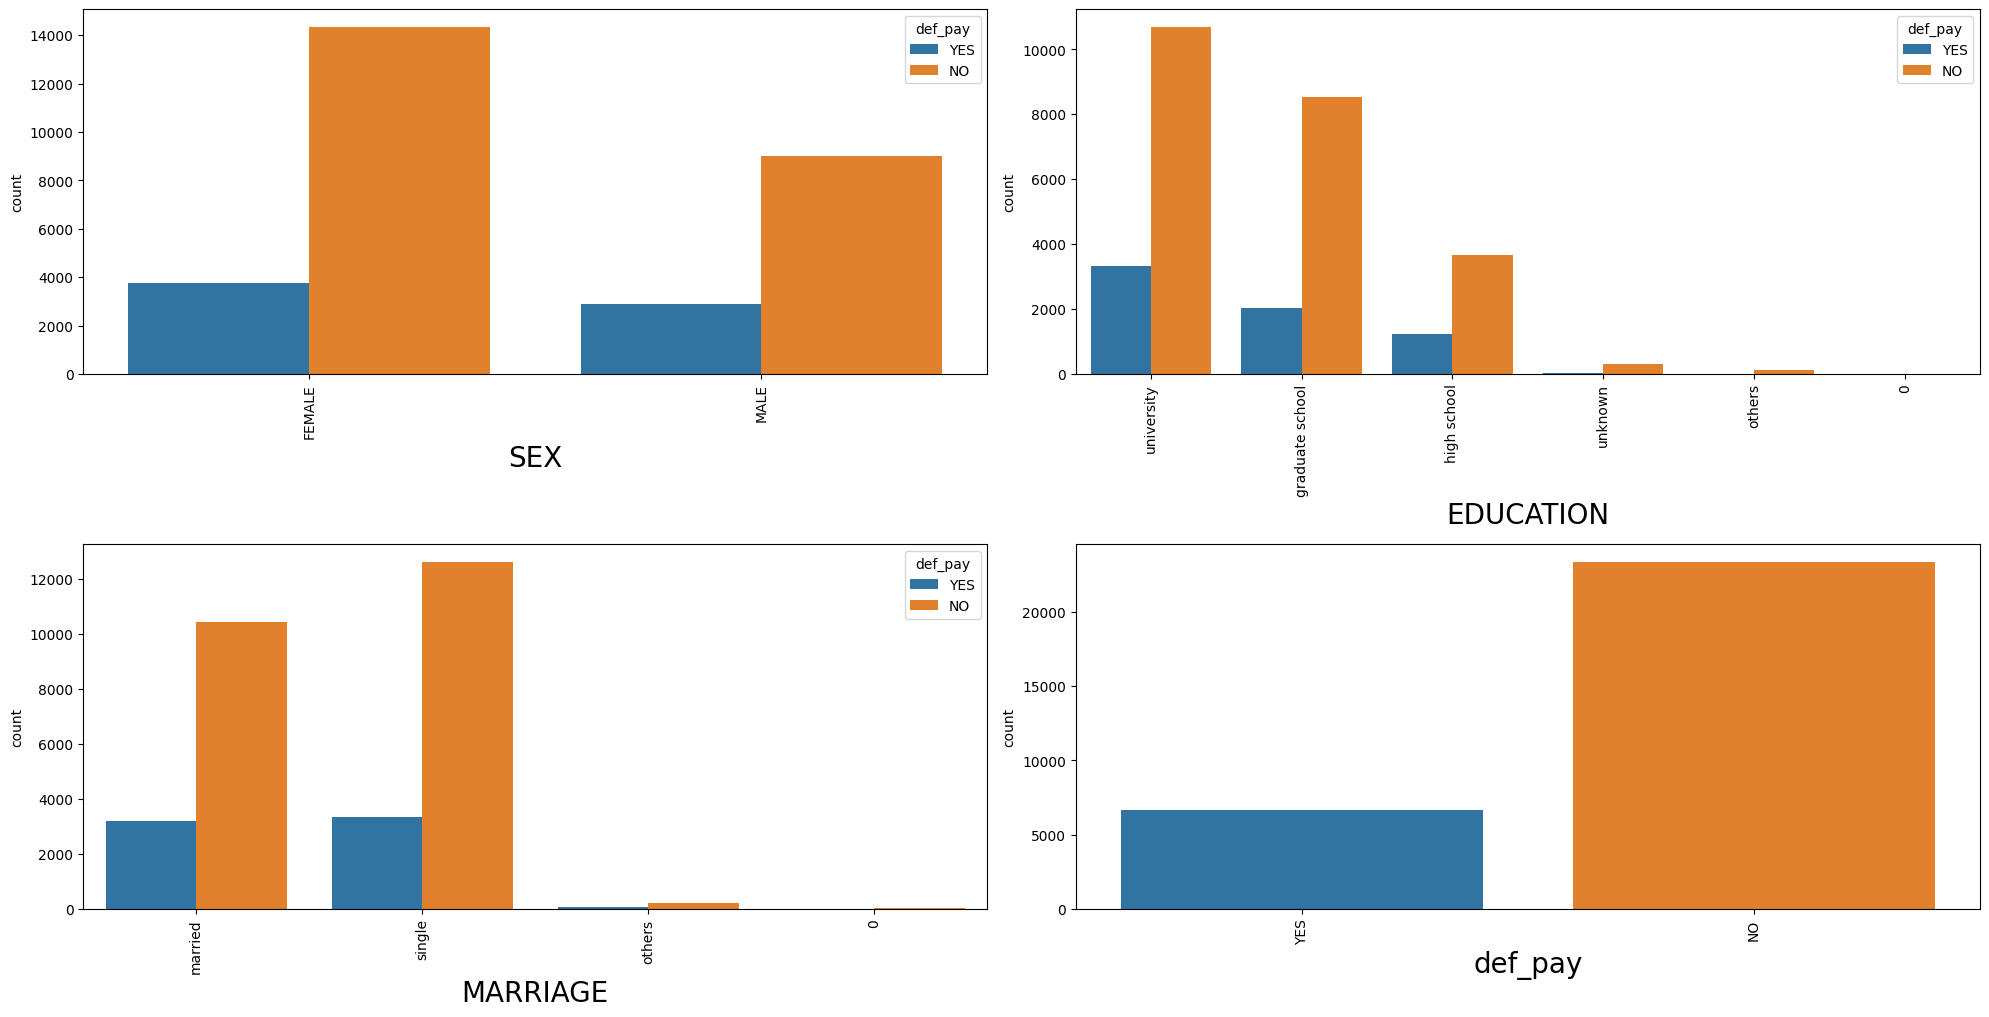

In [245]:
plt.figure(figsize=(20,20))
plot_count=1
for i in df1:
    if plot_count<=len(df1.columns):
        ax=plt.subplot(4,2,plot_count)
        fig=sns.countplot(df1,x=df1[i],hue=df1.def_pay)
        #for j in fig.containers:
            #fig.bar_label[j]
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=90)
        
    plot_count+=1
plt.tight_layout()
plt.show()

The plot above shows that there is no much effect on marriage for payment.
The age group indicates that mostly youngsters fall under not paying.
The conclusion based on sex is that female category falls under the threat of not paying.

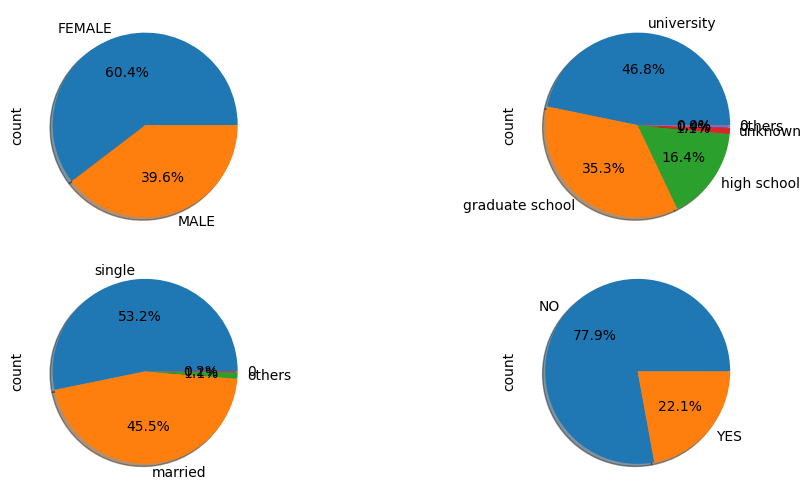

In [246]:
plt.figure(figsize=(10,10))
pie_count=1
for i in df1:
    if (pie_count<=5):
        array=df1[i].value_counts()
        label=df1[i].value_counts().index
        plt.subplot(4,2,pie_count)
        array.plot(kind='pie',labels=label,autopct='%1.1f%%',fontsize=10,shadow=True)
    pie_count+=1
plt.tight_layout()
plt.show()

In [248]:

df2=df[[ 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

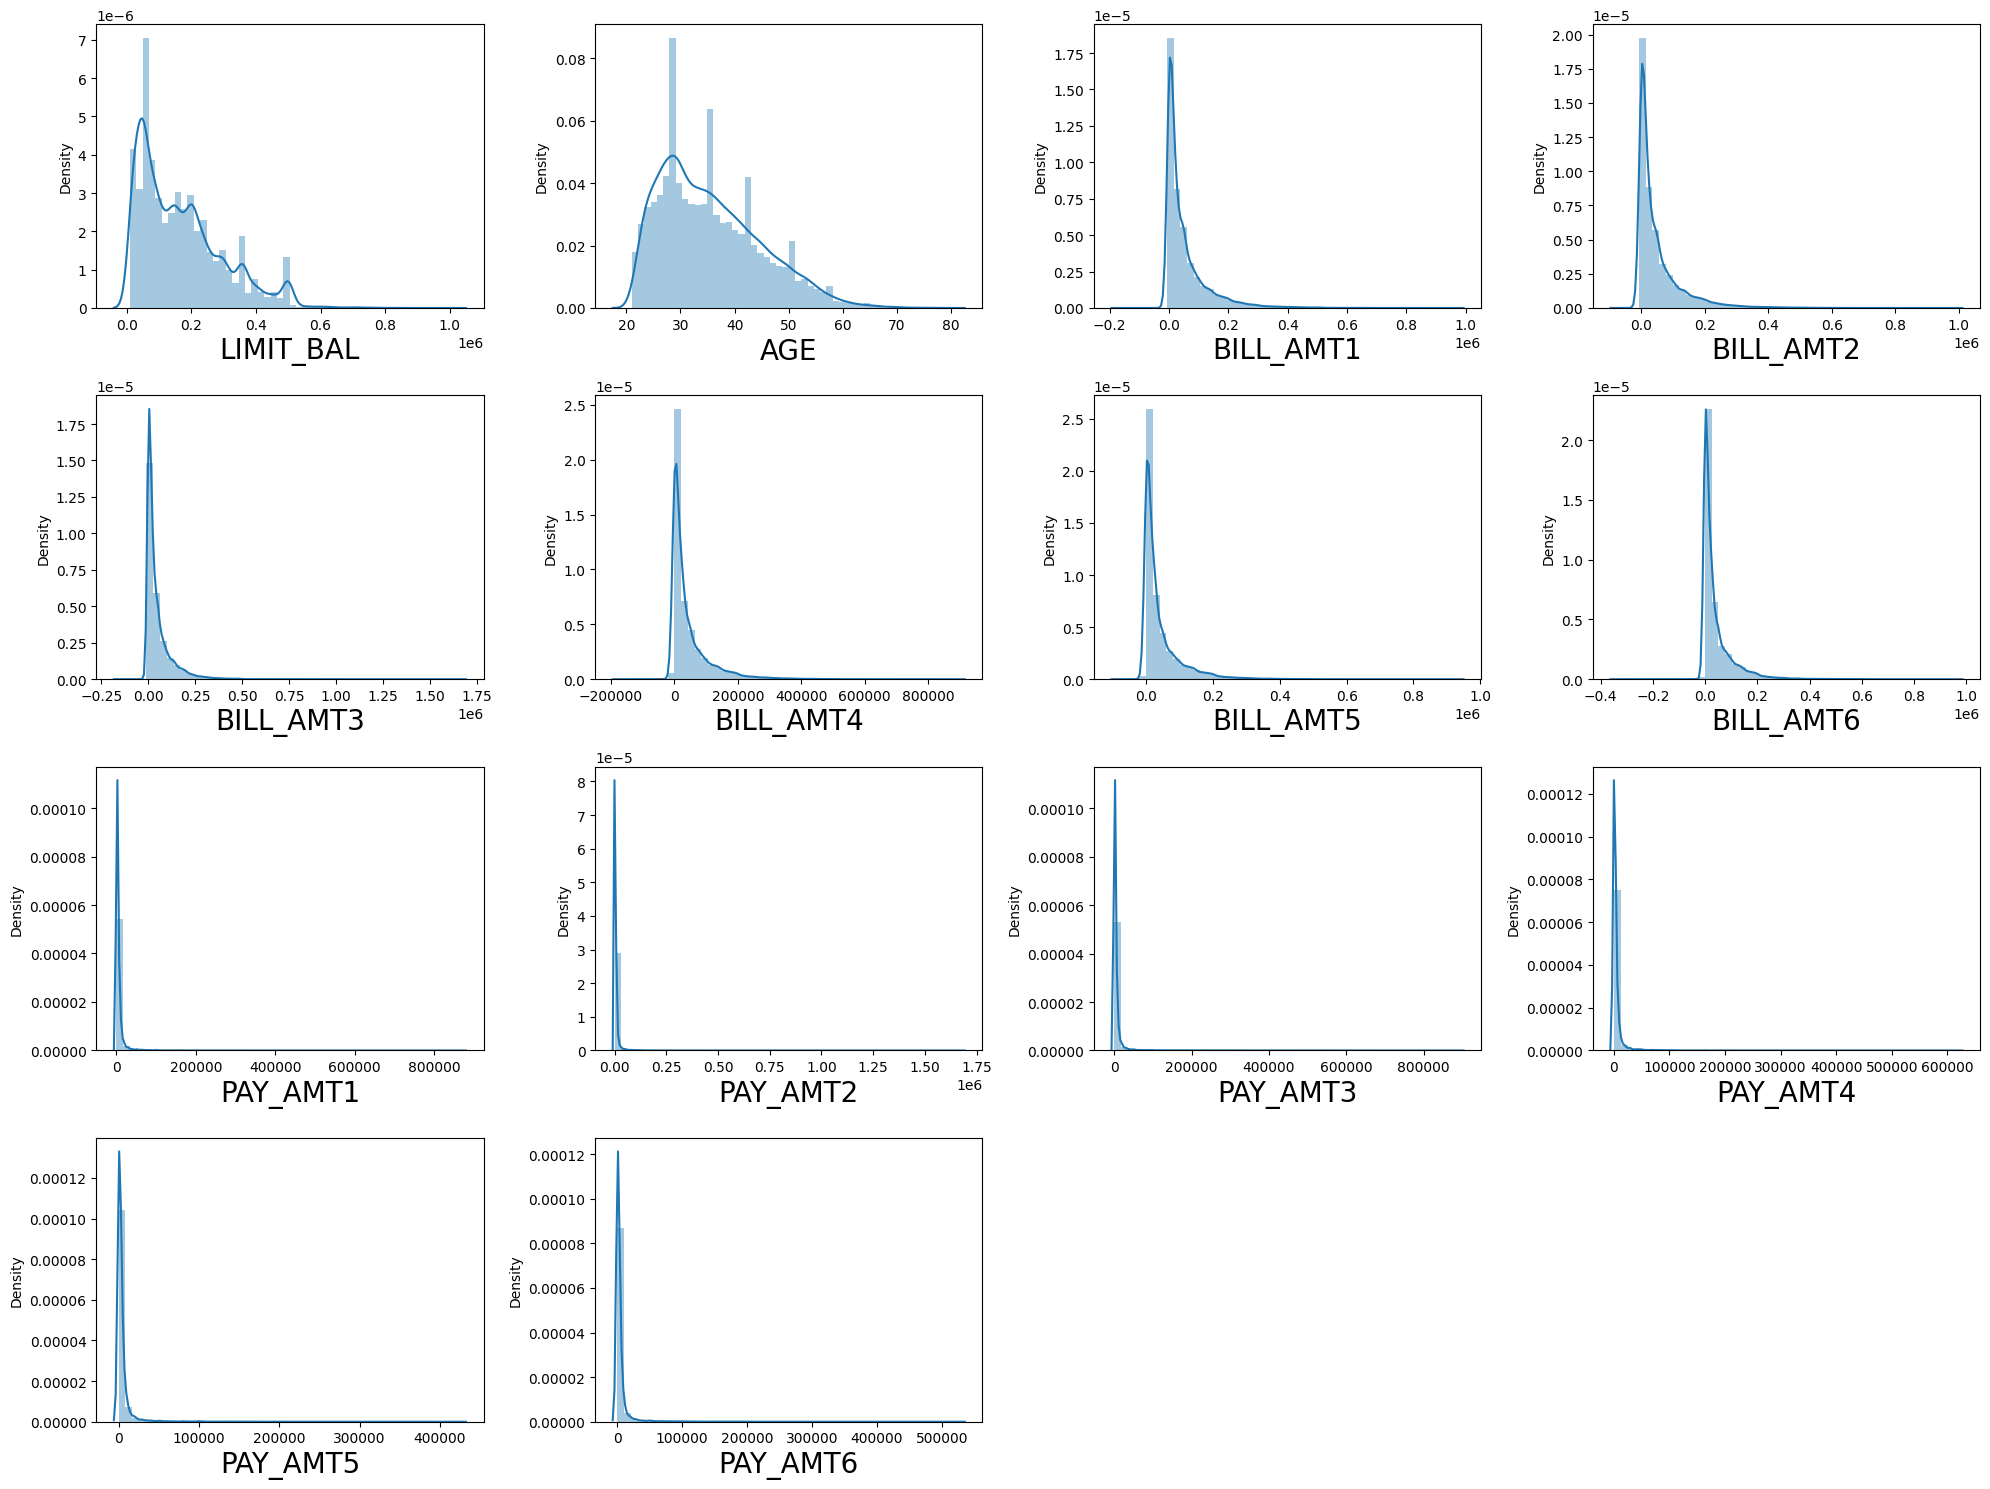

In [249]:
columns_num=len(df2.columns)
plot_count=1
plt.figure(figsize=(20,15))
for i in df2:
    if plot_count<=columns_num: 
        ax1=plt.subplot(4,4,plot_count)
        ax2=sns.distplot(df2[i],kde=True)
        plt.xlabel(i,fontsize=20)
    plot_count+=1
plt.tight_layout()
plt.show()
        